In [1]:
%load_ext autoreload
%autoreload 2

# Install Dependencies

In [2]:
# !pip3 uninstall datasci_stdlib_tools
# !apt-get update && apt-get install -y pandoc
# !pip3 install pypandoc
# !pip3 install git+https://github.com/reimerlab/datasci_tools.git
# !pip3 install git+https://github.com/reimerlab/neuron_morphology_tools.git
# apt-get update && apt-get install -y graphviz

In [3]:
import scipy
scipy.signal.gaussian = scipy.signal.windows.gaussian

# Test Package Installed

In [4]:
import neuron_morphology_tools as nmt

In [5]:
from pathlib import Path

In [6]:
import bz2 #if dont have install with pip3 install bz2file
import _pickle as cPickle #already comes with the standard library
from pathlib import Path

# Load any compressed pickle file
def decompress_pickle(filename,verbose = False,):
    """
    Example: 
    data = decompress_pickle('example_cp.pbz2') 
    """
    if type(filename) == type(Path()):
        filename = str(filename.absolute())
    if filename[-5:] != ".pbz2":
        filename += ".pbz2"
        
    if verbose:
        print(f"Decompressing: {filename}")
        
    data = bz2.BZ2File(filename, 'rb')
    data = cPickle.load(data)
    return data


# Analyzing Graph Object

In [16]:
graph_path = "./864691136105451737_0_auto_proof_v7_proofread.pbz2"

#check that have dj-stor mounted
if not Path(graph_path).exists():
    raise Exception("file not found")

from datasci_tools import system_utils as su
G = su.decompress_pickle(graph_path)

# Visualizing the Neuron Object

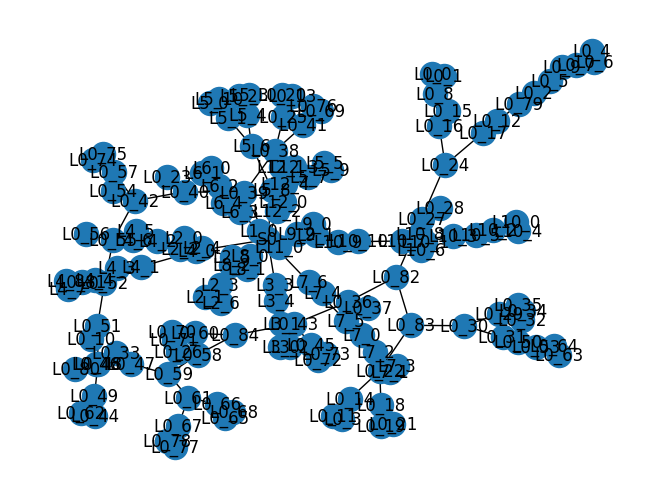

In [17]:
# graphing with generic networkx object
import networkx as nx
nx.draw(nx.Graph(G),with_labels = True)

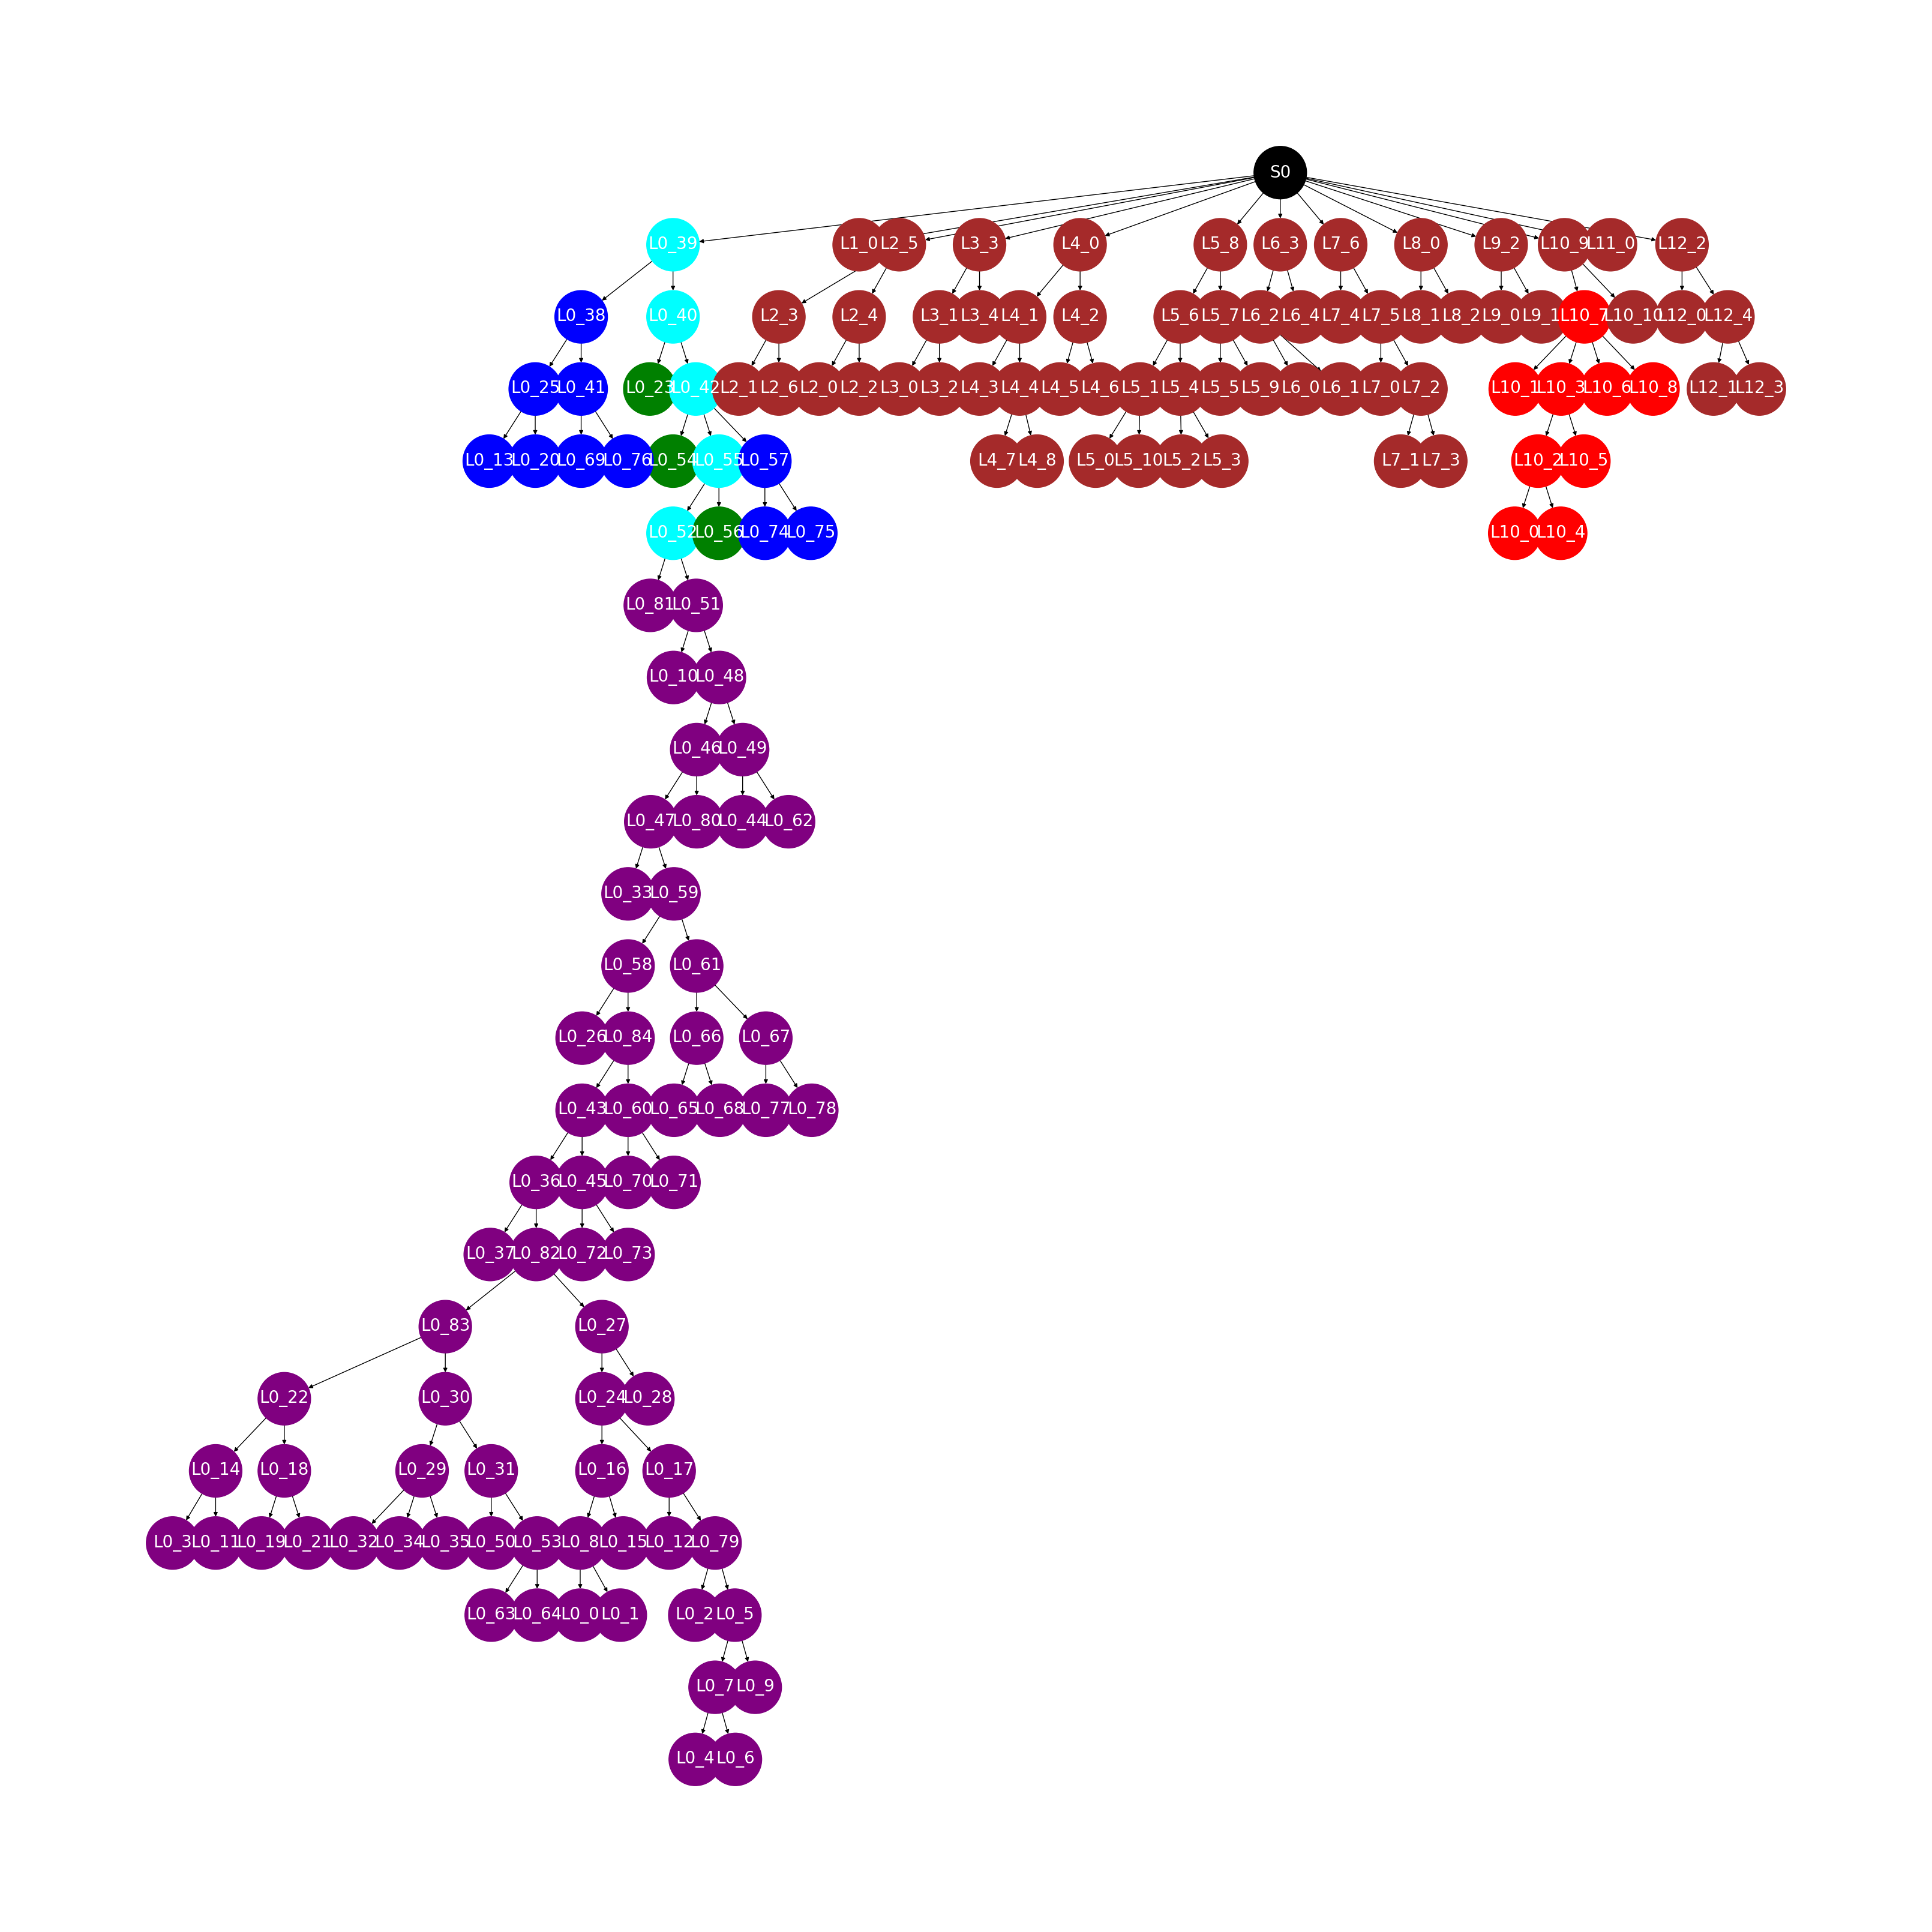

In [18]:
from neuron_morphology_tools import neuron_nx_utils as nxu
nxu.draw_tree(G)

# Accessing the attributes

In [21]:
# accessing node attributes
G.nodes["L0_5"]

{'area': np.float64(62.189276270834114),
 'compartment': 'apical_tuft',
 'axon_compartment': 'dendrite',
 'boutons_cdfs': None,
 'boutons_volume': None,
 'labels': [np.str_('apical'), np.str_('apical_tuft')],
 'mesh_center': array([1318929.56697248,  356102.03013761,  701003.24766055]),
 'endpoint_upstream': array([1303840.,  348094.,  698953.]),
 'endpoint_downstream': array([1335590.,  365633.,  701595.]),
 'mesh_volume': np.float64(180.46288920347405),
 'n_boutons': 0,
 'n_spines': 7,
 'n_synapses': 26,
 'n_synapses_head': 3,
 'n_synapses_neck': 0,
 'n_synapses_no_head': 5,
 'n_synapses_post': 26,
 'n_synapses_pre': 0,
 'n_synapses_shaft': 18,
 'n_synapses_spine': 8,
 'skeletal_length': 37180.13043220434,
 'spine_density': 0.00018827260471191904,
 'spine_volume_density': np.float64(28543.10421660521),
 'spine_volume_median': np.float64(116993064.34675343),
 'synapse_density': 0.0006992982460728421,
 'synapse_density_post': 0.0006992982460728421,
 'synapse_density_pre': 0.0,
 'total_

# Exporting SWC files

In [22]:
filename = nxu.export_swc_file(G)
filename

'/neuron_morphology_tools/Applications/MICrONS/seg_864691136105451737_split_0_nucleus_617893.swc'

# Running Control Morphological Extractions

In [10]:
!pip3 install morphopy
#!pip3 install networkx==2.5


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


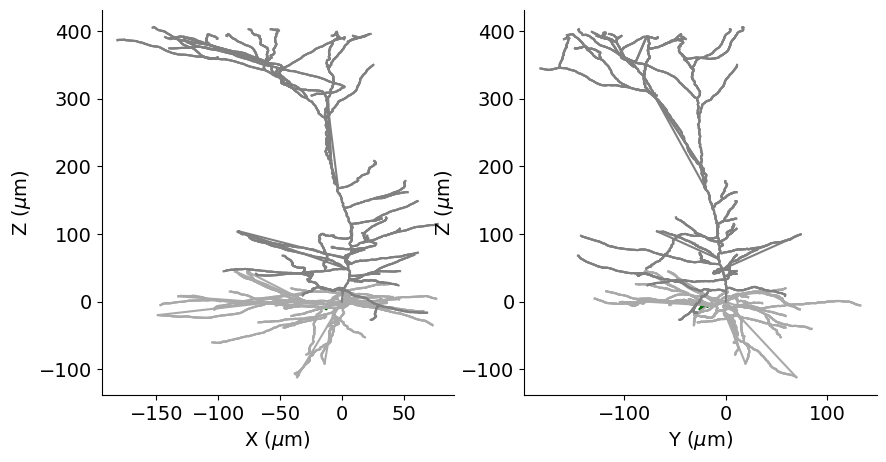

In [19]:
nxu.plot(G)

In [27]:
df_stats = nxu.morphometrics(G)
df_stats_dict = df_stats.T.to_dict()[0]
df_stats_dict

{'normalized depth': 0.1,
 'axon branch points': 3.0,
 'axon width': 2.9399999999999995,
 'axon depth': 11.72,
 'axon height': 5.7,
 'axon robust width': 2.7525000000000013,
 'axon robust depth': 10.842500000000001,
 'axon robust height': 4.987500000000001,
 'axon x-bias': 22.740000000000002,
 'axon z-bias': -16.46,
 'axon tips': 6.0,
 'axon total length': 22.83486206317386,
 'axon max path distance to soma': 14.78254248685975,
 'axon max branch order': 3.0,
 'axon max path angle': 146.34942411869275,
 'axon median path angle': 23.738479920185544,
 'axon max segment length': 4.95494755134022,
 'axon log max tortuosity': 0.39507851076599076,
 'axon log min tortuosity': 0.003157766197024095,
 'axon log median tortuosity': 0.04923421369122765,
 'axon max branch angle': 113.1068815237769,
 'axon min branch angle': 63.073453719951885,
 'axon mean branch angle': 79.18114927319913,
 'axon above soma': 0.0,
 'soma radius': 10.635873480213494,
 'mean initial segment radius': 0.01305481214356992